In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np
import pandas as pd
# import shutil
# import random
# from glob import glob
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#**Loading data**

In [ ]:
X = []
y = []

# Path to the folder containing images
data_folder = '/content/drive/MyDrive/Colab Notebooks/Dataset'

# Iterate through 'yes' and 'no' folders
for label, folder_name in tqdm(enumerate(['no', 'yes'])):
    folder_path = os.path.join(data_folder, folder_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))  # Resize image to (224, 224)
        X.append(img)
        y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

0it [00:00, ?it/s]

In [ ]:
#y before

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
print(len(X), " ", len(y))

1013   1013


In [ ]:
print ("Shape of an image in X_train: ", X.shape)
print ("Shape of an image in X_test: ", y.shape)

Shape of an image in X_train:  (1013, 224, 224, 3)
Shape of an image in X_test:  (1013,)


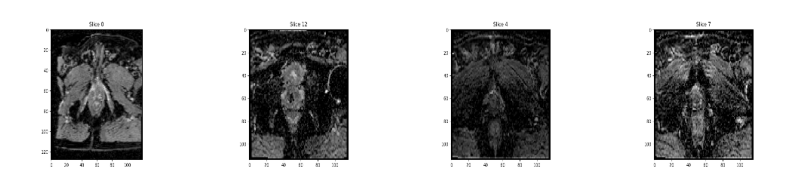

In [ ]:
# Display sample images
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()


In [ ]:
X = np.array(X) / 255.0  # Normalize pixel values
y = np.array(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Check shapes
print("Shape of an image in X_train:", X_train[0].shape)
print("Shape of an image in X_test:", X_test[0].shape)
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)


Shape of an image in X_train: (224, 224, 3)
Shape of an image in X_test: (224, 224, 3)
X_train Shape: (678, 224, 224, 3)
X_test Shape: (335, 224, 224, 3)
y_train Shape: (678,)
y_test Shape: (335,)


#**Preprocessing**

In [ ]:
source_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset"
train_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/Test"
validate_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset/Validate"


# Define data generators for train, validation, and test sets
Train_Datagen = ImageDataGenerator(dtype='float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)
Val_Datagen = ImageDataGenerator(dtype='float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)
Test_Datagen = ImageDataGenerator(dtype='float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)

# Create train, validation, and test generators
batch_size = 32
train_generator = Train_Datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary')
val_generator = Val_Datagen.flow_from_directory(validate_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary')
test_generator = Test_Datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary')

Found 961 images belonging to 2 classes.
Found 193 images belonging to 2 classes.
Found 186 images belonging to 2 classes.


In [ ]:
# Get a batch of data from the generator
batch_train_images, batch_train_labels = next(train_generator)
batch_val_images, batch_val_labels = next(val_generator)
batch_test_images, batch_test_labels = next(test_generator)


# Check the shape of the batch data
print("Shape of training batch images:", batch_train_images.shape)
print("Shape of training batch labels:", batch_train_labels.shape)
print("Shape of validation batch images:", batch_val_images.shape)
print("Shape of validation batch labels:", batch_val_labels.shape)
print("Shape of testing batch images:", batch_test_images.shape)
print("Shape of testing batch labels:", batch_test_labels.shape)

Shape of training batch images: (32, 224, 224, 3)
Shape of training batch labels: (32,)
Shape of validation batch images: (32, 224, 224, 3)
Shape of validation batch labels: (32,)
Shape of testing batch images: (32, 224, 224, 3)
Shape of testing batch labels: (32,)


In [ ]:
train_generator.class_indices

{'no': 0, 'yes': 1}

In [ ]:
len(test_generator)

6

#**Load Models**

In [ ]:
from tensorflow.keras.models import load_model
# Load the model
vgg16_loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/Dataset/Trained_model/model_vgg16_gen.h5')

In [ ]:
# Load the model
resnet50_loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/Dataset/Trained_model/model_resnet50.h5')

In [ ]:
inceptionv3_loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/Dataset/Trained_model/model_inceptionv3.h5')

1/1 [==============================] - 1s 980ms/step


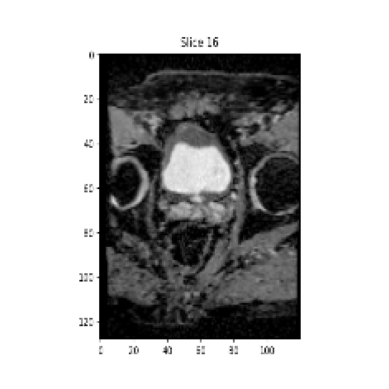

True Label:  Cancer
Predicted Label: Cancer


In [ ]:
import numpy as np

# Randomly choose an index from X_test
random_index = np.random.randint(0, len(X_test))

# Get the random image and its label
random_image = X_test[random_index]
true_label = y_test[random_index]

# Reshape the image to fit VGG16 input shape
random_image = np.expand_dims(random_image, axis=0)

# Make predictions using the model
predictions = vgg16_loaded_model.predict(random_image)

# Convert predictions to labels
predicted_label = "Cancer" if predictions[0][0] < 0.5 else "No Cancer"

# Show the image
plt.imshow(random_image[0])
plt.axis('off')
plt.show()

# Print true and predicted labels
print(f'True Label: {"No Cancer" if true_label == 0 else " Cancer"}')
print(f'Predicted Label: {predicted_label}')


In [ ]:
# Assuming you have a test generator named test_generator
generator_size = len(test_generator)

print("Size of the generator:", generator_size)

Size of the generator: 6


In [ ]:
# Get one batch of test data from the generator
test_data, test_labels = test_generator.next()

# Flatten the true labels
true_labels = test_labels.flatten()

In [ ]:
len(true_labels)

32

In [ ]:
predictions_vgg16 = vgg16_loaded_model.predict(test_generator)

6/6 [==============================] - 5s 676ms/step


In [ ]:
# Determine the size of predictions_resnet50
num_vgg16_predictions = predictions_vgg16.shape[0]
num_vgg16_predictions

186

In [ ]:
predictions_inceptionv3 = inceptionv3_loaded_model.predict(test_generator)

6/6 [==============================] - 4s 421ms/step


In [ ]:
# Determine the size of predictions_resnet50
num_inceptionv3_redictions = predictions_inceptionv3.shape[0]
num_inceptionv3_redictions

186

In [ ]:
predictions_resnet50 = resnet50_loaded_model.predict(test_generator)

6/6 [==============================] - 41s 8s/step


In [ ]:
# Determine the size of predictions_resnet50
num_resnet_predictions = predictions_resnet50.shape[0]
num_resnet_predictions

186

In [ ]:
# Initialize lists to collect predictions and true labels
all_true_labels = []
all_pred_vgg16 = []
all_pred_inceptionv3 = []
all_pred_resnet50 = []

# Loop through the entire test set
for i in range(len(test_generator)):
    test_data, test_labels = test_generator.next()
    all_true_labels.extend(test_labels.flatten())

    # Generate predictions for the current batch
    pred1 = vgg16_loaded_model.predict(test_data)
    pred2 = inceptionv3_loaded_model.predict(test_data)
    pred3 = resnet50_loaded_model.predict(test_data)

    all_pred_vgg16.extend(np.round(pred1).astype(int).flatten())
    all_pred_inceptionv3.extend(np.round(pred2).astype(int).flatten())
    all_pred_resnet50.extend(np.round(pred3).astype(int).flatten())

# Convert lists to numpy arrays
all_true_labels = np.array(all_true_labels)
all_pred_vgg16 = np.array(all_pred_vgg16)
all_pred_inceptionv3 = np.array(all_pred_inceptionv3)
all_pred_resnet50 = np.array(all_pred_resnet50)

# Majority voting
predicted_labels = np.array([np.argmax(np.bincount([all_pred_vgg16[i], all_pred_inceptionv3[i], all_pred_resnet50[i]])) for i in range(len(all_true_labels))])


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
len(all_true_labels)

186

In [ ]:
len(predicted_labels)

186

In [ ]:
# Compute metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='binary')
recall = recall_score(true_labels, predicted_labels, average='binary')
f1 = f1_score(true_labels, predicted_labels, average='binary')

# Format the metrics to 2 decimal places
accuracy = round(accuracy, 2)
precision = round(precision, 2)
recall = round(recall, 2)
f1 = round(f1, 2)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Store the metrics in lists for plotting
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

Accuracy: 0.97
Precision: 0.94
Recall: 1.0
F1 Score: 0.97


<ipython-input-21-611644492e08>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Metric', y='Score', data=df, palette='Blues_d')


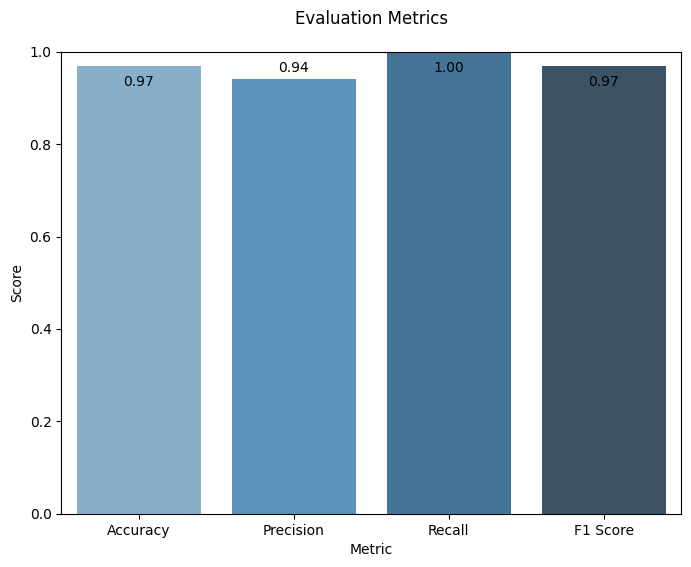

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for seaborn
df = pd.DataFrame({
    'Metric': names,
    'Score': values
})

# Create the barplot
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Metric', y='Score', data=df, palette='Blues_d')

# Annotate the bars
for index, value in enumerate(values):
    barplot.text(index, value - 0.05 if value >= 0.95 else value + 0.01, f'{value:.2f}', ha='center', va='bottom', color='black')

# Set the plot attributes
plt.ylabel('Score')
plt.title('Evaluation Metrics', pad=20)  # Add padding to avoid overlap with the bars
plt.ylim(0, 1)

# Display the plot
plt.show()


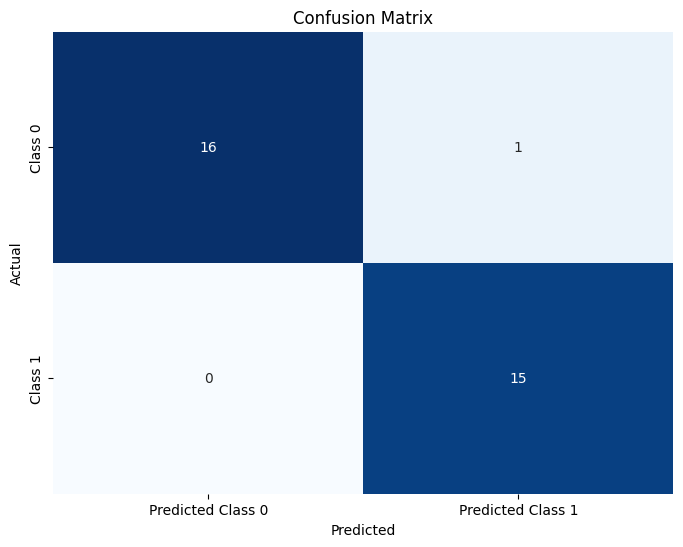

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# Convert the confusion matrix to a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Class 0', 'Class 1'], columns=['Predicted Class 0', 'Predicted Class 1'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate the classification report
class_report = classification_report(true_labels, predicted_labels, target_names=['Class 0', 'Class 1'])

print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.94      0.97        17
     Class 1       0.94      1.00      0.97        15

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



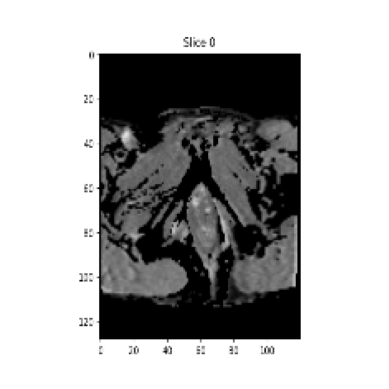

Predicted Label (Ensemble): No Cancer, True Label: No Cancer


In [ ]:
# Assuming you have populated average_labels correctly
# Determine the length of average_labels
num_average_labels = len(average_labels)

# Generate a random index within the valid range
random_index = np.random.randint(0, num_average_labels)

# Retrieve the random image corresponding to the random_index
random_image = X_test[random_index]

# Determine the true label corresponding to the random_index
true_label = y_test[random_index]

# Convert true_label to string representation
true_label_str = "Cancer" if true_label == 1 else "No Cancer"

# Show the image
plt.imshow(random_image)
plt.axis('off')
plt.show()

print(f"Predicted Label (Ensemble): {average_labels[random_index]}, True Label: {true_label_str}")

In [ ]:
random_image.shape

(224, 224, 3)